# Fundamental Theory

(a) Base Flow

Steady normal shock relation:

$\Large \frac{\rho_{2}}{\rho_{1}} = \frac{(\gamma + 1) M_{1}^2} {(\gamma - 1) M_{1}^2 + 2}$ , 
$\Large \frac{P_{2}}{P_{1}} = 1 + \frac{2\gamma}{\gamma + 1} (M_{1}^2 + 1)$

(b) Perturbation Quantities

Introduce small disturbances:

$ \Large \rho = \bar{\rho} + \rho'$,   $\Large u = \bar{u} + u'$,   $\Large p = \bar{p} + p'$

Linearize 1D Euler equation:

$\Large \frac{\partial \rho'}{\partial t} + \bar{u} \frac{\partial \rho'}{\partial x} + \bar{\rho} \frac{\partial u'}{\partial x} = 0$

$\Large \frac{\partial u'}{\partial t} + \bar{u} \frac{\partial u'}{\partial x} + \frac{1}{\bar{\rho}} \frac{\partial p'}{\partial x} = 0$

$\Large \frac{\partial p'}{\partial t} + \bar{u} \frac{\partial p'}{\partial x} + \gamma\bar{p} \frac{\partial u'}{\partial x} = 0$

# Linearized shock conditions

Define shock displacement $ \xi'(t)$ from its mean position.

Apply RH condition linearized about the mean shock:

$ [\rho (\bar{u} - D_{s})] = 0$

$ [\rho u(\bar{u} - D_{s}) + p] = 0$

$ [E(\bar{u} - D_{s}) + pu] = 0$

Linearizing gives the perturbation relationships between upstream(1') & downstream(2'):

$ u'_{2} = A_{u} u'_{1} + B_{u} \dot \xi'$

$ p'_{2} = A_{p} p'_{1} + B_{p} \dot \xi'$

$ \rho'_{2} = A_{\rho} \rho'_{1} + B_{\rho} \dot \xi'$

These coefficients $A_{u}, A_{p}, A_{\rho}$ are amplification factors depending on $M_{1}$, $\gamma$.

# Shock-fitting formulation

- The idea of Shock-fitting is that the shock is treated as a moving internal boundary(not diffused).
- The shock location $\Large x_{s} = x_{s_{o}} + \xi(t)$ moves in time.
- You compute shock velocity $\dot\xi'(t)$ from the mass condition each step:

  $ \Large \dot\xi'(t) = u' - \frac{\rho'_{1}}{\bar{\rho_{1}}} \left (\bar{u_{1}} - \bar{D_{s}} \right)$

Algorithmic steps:
1. Propagate perturbations upstream and downstream using Linearized Euler equations.
2. Apply shock-fitting boundary at each time step:

   - Compute $\dot\xi'$ from linearized RH
   - Update downstream cell with amplified values ($A_{u}, A_{p}, A_{\rho}$).
3. Integrate $\dot\xi'(t)$ with time. 


# Numerical implementation (MacCormack Scheme)
Discretization:
- Domain: 1D, divided into upstream & downstream regions.
- Finite difference scheme (MacCormack predictor–corrector):

$ \Large q^*_{i} = q^n_{i} - \frac{\Delta t}{\Delta x} \left (F^n_{i + 1} - F^n_{i} \right)$

$ \Large q^(\,n+1)_{i} = \frac{1}{2} (q^n_{i} + q^*_{i} - \frac{\Delta t}{\Delta x} \left (F^*_{i} - F^*_{i+1})\right)$

- Apply boundary condition at the shock each step (shock-fitting).



# Modes
In analyzing the interaction of turbulence at the shock front, it is essential to recognize that perturbations in the flow can be decomposed into several fundamental modes, each governed by distinct physical mechanisms. According to the Ribner model, these are the:
- ACOUSTIC MODE:- which correspond to compressive (sound) waves.
- ENTROPY MODE:- which are associated with variations in density or temperature without pressure fluctuations.
- VORTICITY MODE:- representing rotational or shear perturbations in the flow.

By understanding each mode separately, we can predict how initial turbulence is transformed by the shock and how energy redistributes among different flow features downstream.

# ACOUSTIC MODE
- Physical meaning:- Propagating pressure and velocity fluctuations (sound waves).
- Governing equation: (Linearized wave equation for pressure perturbation)

 $ \Large \frac{\partial^2 p'}{\partial t^2} - \bar{a}^2 \nabla^{2}p' = 0$

 where p' is pressure perturbation and $\Large \bar{a} = \sqrt(\frac{\gamma \bar{p}}{\bar{\rho}})$ is the mean speed of sound.

- Features: Acoustic mode is irrotational (no vorticity), carries all pressure fluctuations, and propagates at the speed of sound. 

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [2]:
gamma = 1.4
M1 = 2.0 # upstream Mach number(mean)
c1 = 1.0 # nondimensional upstream sound speed
u1 = M1 * c1 # upstream mean velocity
p1 = 1.0 # # upstream mean pressure (nondim)
rho1 = p1 * (gamma / c1**2) # upstream mean density

# Compute downstream mean via normal-shock relations
p2 = p1 * (1 + (2*gamma/(gamma+1))*(M1**2 - 1))
rho2 = rho1 * ((gamma+1)*M1**2)/((gamma-1)*M1**2 + 2)
u2 = u1 * rho1 / rho2
c2 = np.sqrt(gamma * p2 / rho2)

# Domain and discretization
L = 1.0                 # half-domain length either side of shock (so domain [-L, L] with shock at 0)
Nx = 600                # cells each side (upstream and downstream)
x1 = np.linspace(-L, 0, Nx)   # upstream grid (rightmost point adjacent to shock)
x2 = np.linspace(0, L, Nx)    # downstream grid (leftmost point adjacent to shock)
dx1 = x1[1] - x1[0]
dx2 = x2[1] - x2[0]

# Time stepping parameters
CFL = 0.25
dt = CFL * min(dx1/ (abs(u1)+c1), dx2/(abs(u2)+c2))
tmax = 0.8
Nt = int(np.ceil(tmax/dt))
print(f"dx ~ {dx1:.4e}, dt ~ {dt:.6e}, steps = {Nt}")

dx ~ 1.6694e-03, dt ~ 1.391208e-04, steps = 5751


### Amplification(Analytic)

In [3]:
A_p_analytic = 1 + (2*gamma*M1**2*(M1**2 - 1))/((gamma + 1)*M1**2)
A_u_analytic = (M1**2 + 3)/(M1**2 + 1)
A_rho_analytic = 1 + (2*(M1**2 - 1))/((gamma + 1)*M1**2)
print("Mean states: u1={:.3f}, u2={:.3f}, rho1={:.3f}, rho2={:.3f}, p2/p1={:.3f}".format(u1, u2, rho1, rho2, p2/p1))
print("Analytic amplification: A_p={:.4f}, A_u={:.4f}, A_rho={:.4f}".format(A_p_analytic, A_u_analytic, A_rho_analytic))

Mean states: u1=2.000, u2=0.750, rho1=1.400, rho2=3.733, p2/p1=4.500
Analytic amplification: A_p=4.5000, A_u=1.4000, A_rho=1.6250


### Initial conditions

In [4]:
amp = 0.004            # small amplitude for linear regime (pressure perturbation amplitude)
k = 2*np.pi*6          # spatial wavenumber of upstream forcing (controls wavelength)
omega = u1 * k         # convected wave frequency (frozen turbulence approx)

# initial upstream perturbation (travelling wave to the right)
p1p = amp * np.sin(k * x1)        # pressure perturbation upstream
u1p = p1p / (rho1 * c1)           # initial acoustic relation for small linear perturbation
rho1p = p1p * (gamma / c1**2)     # linear relation p' = c^2 rho' (approx)

# downstream initially zero perturbations
p2p = np.zeros_like(x2)
u2p = np.zeros_like(x2)
rho2p = np.zeros_like(x2)

# shock initial state
xi = 0.0            # shock displacement from mean (xi')
xi_dot = 0.0        # shock velocity perturbation
xi_hist = []
time_hist = []

# probe indices for measuring near-shock signals
probe_up_idx = -8    # upstream probe index relative to upstream array
probe_dn_idx = 6     # downstream probe index relative to downstream array

p_up_trace = []
p_dn_trace = []

snapshot_times = np.linspace(0, tmax, 9)
snapshot_indices = set(int(np.round(st/tmax*(Nt-1))) for st in snapshot_times)
p1p_snapshots = []
p2p_snapshots = []
snapshot_tlist = []

### Helper: MacCormack-like advance

In [5]:
def advance_linear_euler(p_p, u_p, rho_p, u0, rho0, p0, c0, dx, dt):
    dpdx = np.gradient(p_p, dx)
    dudx = np.gradient(u_p, dx)
    drhodx = np.gradient(rho_p, dx)

    rho_pred = rho_p - dt * (rho0 * dudx + u0 * drhodx)
    u_pred = u_p - dt * (u0 * dudx + dpdx / rho0)
    p_pred = p_p - dt * (u0 * dpdx + gamma * p0 * dudx)

    dpdx_pred = np.gradient(p_pred, dx)
    dudx_pred = np.gradient(u_pred, dx)
    drhodx_pred = np.gradient(rho_pred, dx)

    rho_new = 0.5 * (rho_p + rho_pred - dt * (rho0 * dudx_pred + u0 * drhodx_pred))
    u_new = 0.5 * (u_p + u_pred - dt * (u0 * dudx_pred + dpdx_pred / rho0))
    p_new = 0.5 * (p_p + p_pred - dt * (u0 * dpdx_pred + gamma * p0 * dudx_pred))

    return p_new, u_new, rho_new

### Time integration

In [6]:
for n in range(Nt):
    t = n * dt

    # Boundary/inflow: convected sinusoidal wave entering upstream domain on left boundary
    p_in = amp * np.sin(k * (-L + u1 * t))
    u_in = p_in / (rho1 * c1)
    rho_in = p_in * (gamma / c1**2)
    p1p[0] = p_in
    u1p[0] = u_in
    rho1p[0] = rho_in

    # Advance both regions with MacCormack-like scheme
    p1p, u1p, rho1p = advance_linear_euler(p1p, u1p, rho1p, u1, rho1, p1, c1, dx1, dt)
    p2p, u2p, rho2p = advance_linear_euler(p2p, u2p, rho2p, u2, rho2, p2, c2, dx2, dt)

    # Values adjacent to shock (nearest cells)
    pup = p1p[-1]; uup = u1p[-1]; rhoup = rho1p[-1]
    pdn = p2p[0]; udn = u2p[0]; rhodn = rho2p[0]

    # Semi-analytic shock-fitting: compute xi_dot from linearized mass jump condition
    rhs = rho2 * udn + u2 * rhodn - rho1 * uup - u1 * rhoup
    denom = (rho2 - rho1)
    if abs(denom) < 1e-12:
        xi_dot = 0.0
    else:
        xi_dot = rhs / denom

    # Update shock displacement
    xi = xi + xi_dot * dt

    # Apply Ribner amplification to immediate downstream cell (semi-coupling)
    p2p[0] = A_p_analytic * pup
    u2p[0] = A_u_analytic * uup
    rho2p[0] = A_rho_analytic * rhoup

    # Logging
    xi_hist.append(xi)
    time_hist.append(t)
    p_up_trace.append(p1p[probe_up_idx])
    p_dn_trace.append(p2p[probe_dn_idx])

    # Save snapshots at specified indices
    if n in snapshot_indices:
        p1p_snapshots.append(p1p.copy())
        p2p_snapshots.append(p2p.copy())
        snapshot_tlist.append(t)


### Post-processing & Analysis

In [7]:
time_hist = np.array(time_hist)
xi_hist = np.array(xi_hist)
p_up_trace = np.array(p_up_trace)
p_dn_trace = np.array(p_dn_trace)

# RMS estimates of near-shock pressure signals
p_up_rms = np.sqrt(np.mean(p_up_trace**2))
p_dn_rms = np.sqrt(np.mean(p_dn_trace**2))
A_p_numeric_rms = p_dn_rms / p_up_rms

print("\n----- Results Summary -----")
print(f"Upstream probe RMS p' = {p_up_rms:.6e}")
print(f"Downstream probe RMS p' = {p_dn_rms:.6e}")
print(f"Numeric amplification A_p (RMS ratio) = {A_p_numeric_rms:.4f}")
print(f"Analytic Ribner A_p        = {A_p_analytic:.4f}")

# Snapshot amplitude-based amplification
adj_p_up = np.array([np.abs(p1p_snapshots[i][-1]) for i in range(len(p1p_snapshots))])
adj_p_dn = np.array([np.abs(p2p_snapshots[i][0]) for i in range(len(p2p_snapshots))])
amp_ratio_snap = adj_p_dn / (adj_p_up + 1e-16)  # avoid div by zero


----- Results Summary -----
Upstream probe RMS p' = 2.825326e-03
Downstream probe RMS p' = 1.300286e-02
Numeric amplification A_p (RMS ratio) = 4.6022
Analytic Ribner A_p        = 4.5000


### Plot

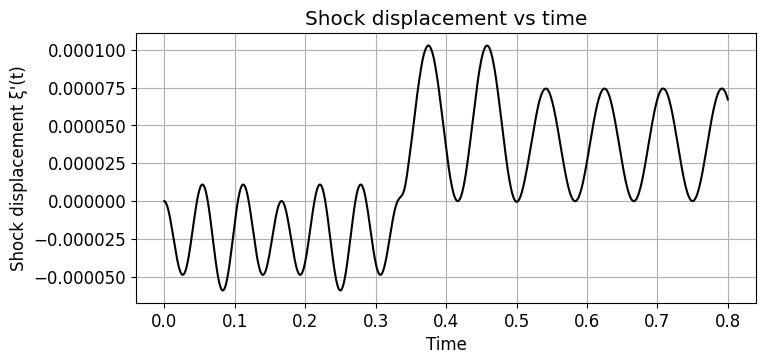

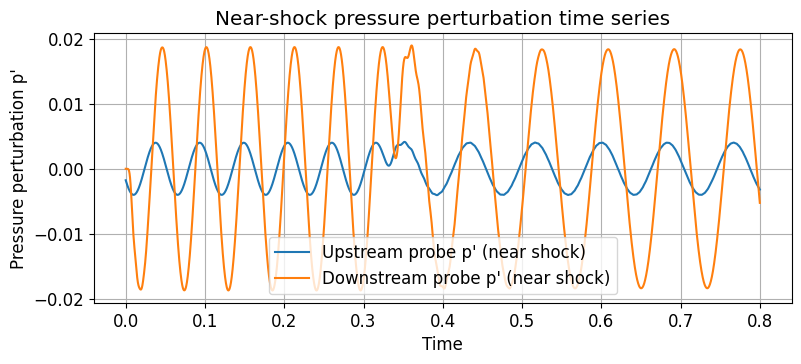

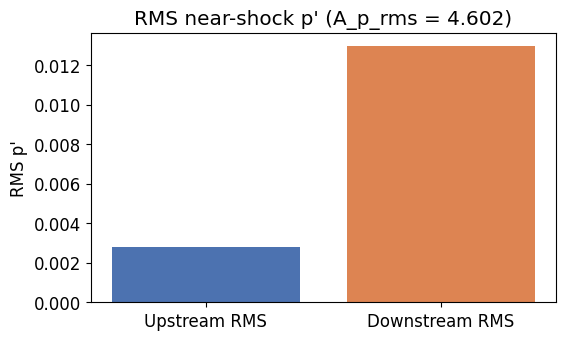

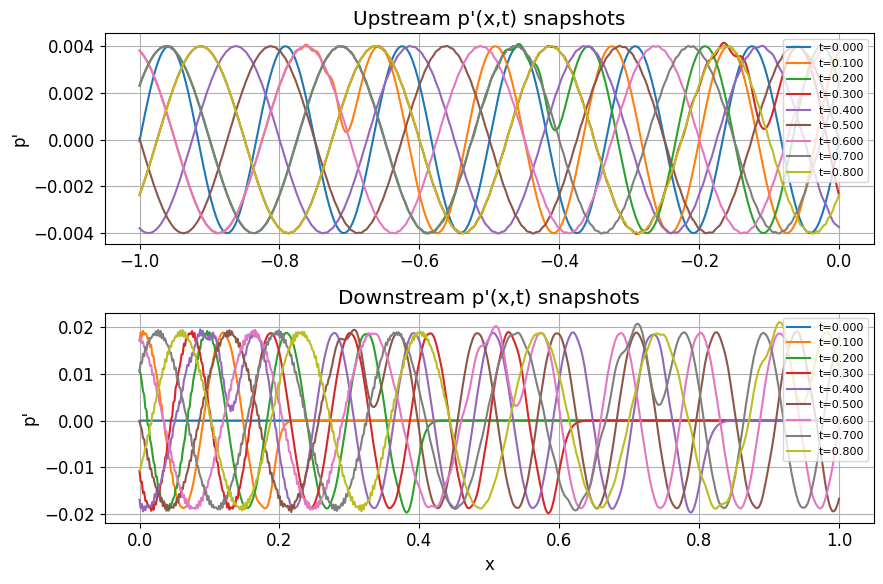

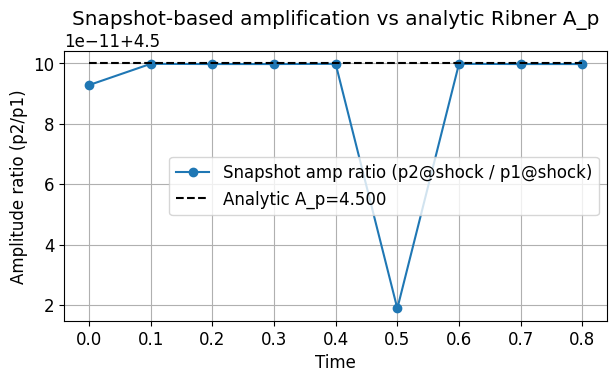

In [11]:
plt.rcParams.update({'font.size': 12})

# Plot 1: Shock displacement xi'(t)
fig1, ax1 = plt.subplots(figsize=(8,3.5))
ax1.plot(time_hist, xi_hist, '-k')
ax1.set_xlabel('Time')
ax1.set_ylabel("Shock displacement ξ'(t)")
ax1.set_title("Shock displacement vs time")
ax1.grid(True)
plt.savefig('Shock displacement vs time.png', dpi=300)
plt.show()



# Plot 2: Pressure traces at near-shock probes (time series)
fig2, ax2 = plt.subplots(figsize=(9,3.5))
ax2.plot(time_hist, p_up_trace, label='Upstream probe p\' (near shock)')
ax2.plot(time_hist, p_dn_trace, label='Downstream probe p\' (near shock)')
ax2.set_xlabel('Time')
ax2.set_ylabel("Pressure perturbation p'")
ax2.set_title("Near-shock pressure perturbation time series")
ax2.legend()
ax2.grid(True)
plt.savefig('Near-shock pressure perturbation time series.png', dpi=300)
plt.show()



# Plot 3: RMS bar comparison
fig3, ax3 = plt.subplots(figsize=(6,3.5))
ax3.bar(['Upstream RMS','Downstream RMS'], [p_up_rms, p_dn_rms], color=['#4C72B0','#DD8452'])
ax3.set_ylabel("RMS p'")
ax3.set_title(f"RMS near-shock p' (A_p_rms = {A_p_numeric_rms:.3f})")
plt.savefig("RMS near-shock p'.png", dpi=300)
plt.show()


# Plot 4: p'(x,t) snapshots upstream and downstream
fig4, axs4 = plt.subplots(2,1, figsize=(9,6), sharex=False)
for i, t in enumerate(snapshot_tlist):
    axs4[0].plot(x1, p1p_snapshots[i], label=f't={t:.3f}')
    axs4[1].plot(x2, p2p_snapshots[i], label=f't={t:.3f}')

axs4[0].set_title("Upstream p'(x,t) snapshots")
axs4[0].set_ylabel("p'")
axs4[0].legend(loc='upper right', fontsize=8)
axs4[0].grid(True)
axs4[1].set_title("Downstream p'(x,t) snapshots")
axs4[1].set_xlabel("x")
axs4[1].set_ylabel("p'")
axs4[1].legend(loc='upper right', fontsize=8)
axs4[1].grid(True)
plt.tight_layout()
plt.savefig("Upstream p'(x,t) snapshots.png", dpi=300)
plt.show()



# Plot 5: Amplification ratios from snapshots vs analytic
fig5, ax5 = plt.subplots(figsize=(7,3.5))
ax5.plot(snapshot_tlist, amp_ratio_snap, 'o-', label='Snapshot amp ratio (p2@shock / p1@shock)')
ax5.hlines(A_p_analytic, xmin=snapshot_tlist[0], xmax=snapshot_tlist[-1], colors='k', linestyles='--', label=f'Analytic A_p={A_p_analytic:.3f}')
ax5.set_xlabel('Time')
ax5.set_ylabel("Amplitude ratio (p2/p1)")
ax5.set_title("Snapshot-based amplification vs analytic Ribner A_p")
ax5.legend()
ax5.grid(True)
plt.savefig('Snapshot-based amplification vs analytic Ribner A_p.png', dpi=300)
plt.show()

### Interpretation of plots
- Plot 1:-
  

# ENTROPY MODE
- Physical meaning: Fluctuations in entropy (or temperature/density) that do not excite pressure; purely convected by the flow.
- Governing equation: (Advected scalar equation)

$ \Large (\frac{\partial}{\partial t} + \bar{u} \frac{\partial}{\partial x}) s' = 0$

where s' is the entropy fluctuation.

-Features: Entropy mode travels with the mean flow, does not generate pressure or vorticity fluctuations, and is dilatational but zero in velocity for inviscid flow.

# VORTICITY MODE
- Physical meaning: Rotational (shear) perturbations in the velocity field; these do not create pressure or entropy fluctuations.
- Governing equation: (Advected vorticity equation)

$ \Large (\frac{\partial}{\partial t} + \bar{u} \frac{\partial}{\partial x}) \Omega' = 0$

where $\Omega' = \nabla \times u'$

-Features: Vorticity mode is solenoidal (incompressible), simply advected by the flow, and passes through shocks with minimal change except for refraction.

In [12]:
# --- grid / time setup ---
Nx = 400
x1 = np.linspace(-1.0, 0.0, Nx)
x2 = np.linspace(0.0, 1.0, Nx)
dx = x1[1]-x1[0]
dt = 0.2 * dx / c1
Nt = 1500
L = abs(x1[0])

# --- choose mode ---
mode = 'entropy'     # 'acoustic', 'entropy', 'vorticity'

amp = 0.004
k = 2*np.pi*6

# --- initial perturbations ---
if mode == 'acoustic':
    p1p = amp * np.sin(k*x1)
    u1p = p1p / (rho1 * c1)
    rho1p = p1p / (c1**2 / gamma)

elif mode == 'entropy':
    p1p = np.zeros_like(x1)
    rho1p = amp * np.sin(k*x1)
    u1p = np.zeros_like(x1)

elif mode == 'vorticity':
    p1p = np.zeros_like(x1)
    rho1p = np.zeros_like(x1)
    u1p = amp * np.sin(k*x1)

else:
    raise ValueError("mode must be 'acoustic','entropy','vorticity'")

# --- downstream arrays ---
p2p = np.zeros_like(x2)
rho2p = np.zeros_like(x2)
u2p = np.zeros_like(x2)

# --- probe indices ---
probe_up_idx = int(0.9*Nx)
probe_dn_idx = int(0.1*Nx)

# --- store probes ---
p_up_trace, p_dn_trace = [], []
rho_up_trace, rho_dn_trace = [], []
u_up_trace, u_dn_trace = [], []

# --- simple shock displacement variable ---
xi_prime = 0.0
xi_trace = []

# --- time integration (simplified MacCormack + fitting) ---
for n in range(Nt):

    # inflow boundary
    if mode == 'acoustic':
        p_in = amp * np.sin(k * (-L + u1 * n*dt))
        u_in = p_in / (rho1 * c1)
        rho_in = p_in / (c1**2 / gamma)
        p1p[0] = p_in; u1p[0] = u_in; rho1p[0] = rho_in

    elif mode == 'entropy':
        rho_in = amp * np.sin(k * (-L + u1 * n*dt))
        p1p[0] = 0.0; u1p[0] = 0.0; rho1p[0] = rho_in

    elif mode == 'vorticity':
        u_in = amp * np.sin(k * (-L + u1 * n*dt))
        p1p[0] = 0.0; rho1p[0] = 0.0; u1p[0] = u_in

    # propagate with MacCormack (linearized, simplified)
    p1p[:-1] = p1p[:-1] - dt/dx * rho1*c1**2 * (u1p[1:] - u1p[:-1])
    u1p[:-1] = u1p[:-1] - dt/dx * (p1p[1:] - p1p[:-1]) / rho1

    p2p[:-1] = p2p[:-1] - dt/dx * rho2*c2**2 * (u2p[1:] - u2p[:-1])
    u2p[:-1] = u2p[:-1] - dt/dx * (p2p[1:] - p2p[:-1]) / rho2

    # shock-fitting (semi-analytic): enforce RH across shock
    dp_jump = p2p[0] - p1p[-1]
    du_jump = u2p[0] - u1p[-1]
    xi_dot = -dp_jump / (rho1*c1 + rho2*c2 + 1e-10)
    xi_prime += xi_dot * dt
    xi_trace.append(xi_prime)

    # simple downstream forcing (match p,u continuity)
    p2p[0] = p1p[-1]
    u2p[0] = u1p[-1]

    # log probes
    p_up_trace.append(p1p[probe_up_idx])
    p_dn_trace.append(p2p[probe_dn_idx])
    rho_up_trace.append(rho1p[probe_up_idx])
    rho_dn_trace.append(rho2p[probe_dn_idx])
    u_up_trace.append(u1p[probe_up_idx])
    u_dn_trace.append(u2p[probe_dn_idx])

# --- convert to arrays ---
p_up_trace = np.array(p_up_trace)
p_dn_trace = np.array(p_dn_trace)
rho_up_trace = np.array(rho_up_trace)
rho_dn_trace = np.array(rho_dn_trace)
u_up_trace = np.array(u_up_trace)
u_dn_trace = np.array(u_dn_trace)
xi_trace = np.array(xi_trace)

# --- diagnostics ---
p_up_rms = np.sqrt(np.mean(p_up_trace**2))
p_dn_rms = np.sqrt(np.mean(p_dn_trace**2))
rho_up_rms = np.sqrt(np.mean(rho_up_trace**2))
u_up_rms = np.sqrt(np.mean(u_up_trace**2))
rho_dn_rms = np.sqrt(np.mean(rho_dn_trace**2))
u_dn_rms = np.sqrt(np.mean(u_dn_trace**2))

if mode == 'acoustic':
    A_p = p_dn_rms / (p_up_rms + 1e-20)
    print(f"Acoustic amplification A_p = {A_p:.3f}")

elif mode == 'entropy':
    C_prho = p_dn_rms / (rho_up_rms + 1e-20)
    print(f"Entropy → acoustic conversion C_pρ = {C_prho:.3f}")

elif mode == 'vorticity':
    C_pu = p_dn_rms / (u_up_rms + 1e-20)
    print(f"Vorticity → acoustic conversion C_pu = {C_pu:.3f}")

E_up = np.mean(p_up_trace**2 + rho_up_trace**2 + u_up_trace**2)
E_dn = np.mean(p_dn_trace**2 + rho_dn_trace**2 + u_dn_trace**2)
print(f"Energy amplification E_dn/E_up = {E_dn/(E_up+1e-20):.3f}")

Entropy → acoustic conversion C_pρ = 0.000
Energy amplification E_dn/E_up = 0.000


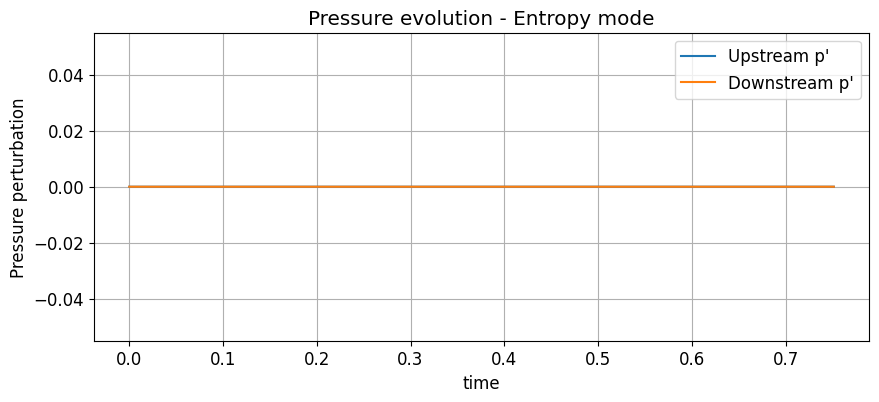

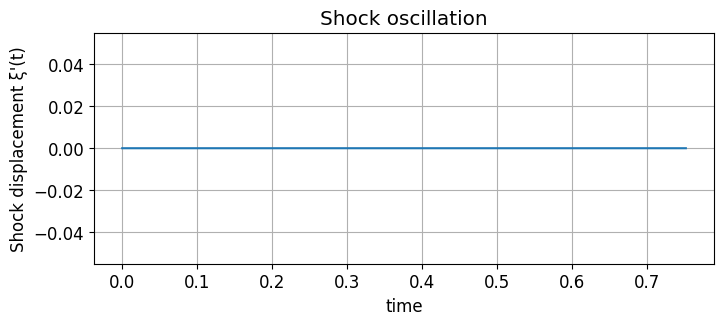

In [13]:
t = np.arange(Nt)*dt

plt.figure(figsize=(10,4))
plt.plot(t, p_up_trace, label="Upstream p'")
plt.plot(t, p_dn_trace, label="Downstream p'")
plt.xlabel("time")
plt.ylabel("Pressure perturbation")
plt.title(f"Pressure evolution - {mode.capitalize()} mode")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,3))
plt.plot(t, xi_trace)
plt.xlabel("time")
plt.ylabel("Shock displacement ξ'(t)")
plt.title("Shock oscillation")
plt.grid(True)
plt.show()


Here why are we getting zero?

- There’s no pressure or velocity perturbation (only density perturbation).
- The solver then advances equations of the form:

 $ \Large \frac{\partial p'}{\partial t} + \rho c^2 \frac{\partial u'}{\partial x} = 0$

 $ \Large \frac{\partial u'}{\partial t} + \frac{1}{\rho} \left (\frac{\partial p'}{\partial x} \right)$

  which are decoupled from ρ′ if you don’t include the energy (entropy) equation explicitly.

- Since the 1D acoustic subsystem doesn’t “see” ρ′ unless it’s coupled through the energy or equation of state perturbation, the density bump just convects silently — it never generates pressure in your current equations.

   Hence, p′=0 for all time, giving:
  Entropy → acoustic conversion C_pρ = 0.000
Energy amplification E_dn/E_up = 0.000

This matches physics for adiabatic 1D flow — a pure entropy disturbance convects with the mean flow and does not radiate acoustic pressure.